In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime as dt
from openpyxl import Workbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 13.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 6.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-cp310-cp310-linux_x86_64.whl size=300451 sha256=5a4ddcad655ef1975a036c3a12fdd62f62b43f17cea4be6a4f6fe1ead5b3e7cb
  Stored in directory: /root/.cache/pip/wheels/8d/0e/f8/48eb93a200fca4c502d7590613616fa4d2c9533f7308f9e28a
Successfully built peewee


In [2]:

stockList = [
    'RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK', 'SBIN', 'KOTAKBANK', 
    'LT', 'ITC', 'BHARTIARTL', 'ASIANPAINT', 'HCLTECH', 'AXISBANK', 'MARUTI', 'BAJFINANCE', 
    'HINDUNILVR', 'TITAN', 'ULTRACEMCO', 'WIPRO', 'NESTLEIND', 'SUNPHARMA', 'POWERGRID', 
    'NTPC', 'BAJAJFINSV', 'M&M', 'TECHM', 'INDUSINDBK', 'JSWSTEEL', 'TATASTEEL', 
    'ADANIPORTS', 'GRASIM', 'CIPLA', 'ONGC', 'SBILIFE', 'BPCL', 'DIVISLAB', 'HEROMOTOCO', 
    'DRREDDY', 'BRITANNIA', 'COALINDIA', 'EICHERMOT', 'APOLLOHOSP', 'HINDALCO', 'TATAMOTORS', 
    'ICICIPRULI', 'UPL', 'ADANIENT', 'DLF', 'BAJAJ-AUTO'
]


stocks = [stock + '.NS' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=800)


def getData(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)['Close']
    returns = stockData.pct_change(fill_method=None).dropna()  # Drop NaN values from returns
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return stockData.iloc[-1], returns, meanReturns, covMatrix  # Returning latest stock prices as well

# Fetch data (returning the latest stock prices, returns, mean returns, and covariance matrix)
stock_prices, returns, meanReturns, covMatrix = getData(stocks, start=startDate, end=endDate)


if returns.empty:
    raise ValueError("No return data available. Ensure stock data is downloaded properly.")

[*********************100%***********************]  49 of 49 completed


In [3]:

stockList = [
    'RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK', 'SBIN', 'KOTAKBANK', 
    'LT', 'ITC', 'BHARTIARTL', 'ASIANPAINT', 'HCLTECH', 'AXISBANK', 'MARUTI', 'BAJFINANCE', 
    'HINDUNILVR', 'TITAN', 'ULTRACEMCO', 'WIPRO', 'NESTLEIND', 'SUNPHARMA', 'POWERGRID', 
    'NTPC', 'BAJAJFINSV', 'M&M', 'TECHM', 'INDUSINDBK', 'JSWSTEEL', 'TATASTEEL', 
    'ADANIPORTS', 'GRASIM', 'CIPLA', 'ONGC', 'SBILIFE', 'BPCL', 'DIVISLAB', 'HEROMOTOCO', 
    'DRREDDY', 'BRITANNIA', 'COALINDIA', 'EICHERMOT', 'APOLLOHOSP', 'HINDALCO', 'TATAMOTORS', 
    'ICICIPRULI', 'UPL', 'ADANIENT', 'DLF', 'BAJAJ-AUTO'
]


stocks = [stock + '.NS' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=800)

# Function to get stock data from Yahoo Finance
def getData(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)['Close']
    returns = stockData.pct_change(fill_method=None).dropna()  # Drop NaN values from returns
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return stockData.iloc[-1], returns, meanReturns, covMatrix  # Returning latest stock prices as well

# Fetch data (returning the latest stock prices, returns, mean returns, and covariance matrix)
stock_prices, returns, meanReturns, covMatrix = getData(stocks, start=startDate, end=endDate)


if returns.empty:
    raise ValueError("No return data available. Ensure stock data is downloaded properly.")

Running batch 1...
Batch 1 completed in 3.91 seconds
Running batch 2...
Batch 2 completed in 3.92 seconds
Running batch 3...
Batch 3 completed in 3.30 seconds
Running batch 4...
Batch 4 completed in 3.30 seconds
Running batch 5...
Batch 5 completed in 3.30 seconds
Running batch 6...
Batch 6 completed in 3.24 seconds
Running batch 7...
Batch 7 completed in 3.31 seconds
Running batch 8...
Batch 8 completed in 3.23 seconds
Running batch 9...
Batch 9 completed in 3.17 seconds
Running batch 10...
Batch 10 completed in 3.25 seconds
Monte Carlo Simulations completed and saved.


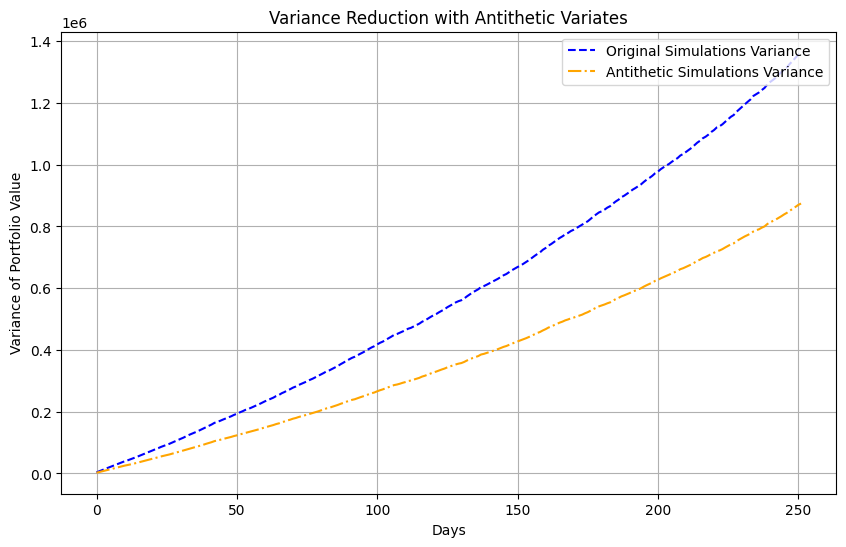

In [4]:
import numpy as np
import matplotlib.pyplot as plt


original_sims = np.load("monte_carlo_original_batch_1.npy")  # Original Monte Carlo
antithetic_sims = np.load("monte_carlo_antithetic_batch_1.npy")  # Antithetic Monte Carlo


original_var = np.var(original_sims, axis=0)  # Variance for original simulations
antithetic_var = np.var(antithetic_sims, axis=0)  # Variance for antithetic simulations


T = original_sims.shape[1]  
days = np.arange(T)

# Plotting the variance comparison
plt.figure(figsize=(10, 6))

plt.plot(days, original_var, label="Original Simulations Variance", color="blue", linestyle="--")
plt.plot(days, antithetic_var, label="Antithetic Simulations Variance", color="orange", linestyle="-.")

plt.title("Variance Reduction with Antithetic Variates")
plt.xlabel("Days")
plt.ylabel("Variance of Portfolio Value")
plt.legend(loc="upper right")
plt.grid(True)

plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


n_batches = 10


portfolio_scaler = MinMaxScaler()
allocations_scaler = MinMaxScaler()

# Normalize and save portfolio values and stock allocations
for batch in range(1, n_batches + 1):
    
    portfolio_values = np.load(f"monte_carlo_combined_batch_{batch}.npy")
    stock_allocations = np.load(f"combined_stock_allocations_batch_{batch}.npy")
    
    # Normalize the portfolio values
    portfolio_values_reshaped = portfolio_values.reshape(-1, 1)  # Reshape to (samples, 1) for normalization
    portfolio_values_normalized = portfolio_scaler.fit_transform(portfolio_values_reshaped).reshape(portfolio_values.shape)
    
    # Normalize the stock allocations
    stock_allocations_reshaped = stock_allocations.reshape(-1, 1)  # Reshape to (samples, 1) for normalization
    stock_allocations_normalized = allocations_scaler.fit_transform(stock_allocations_reshaped).reshape(stock_allocations.shape)
    
    # Save the normalized data
    np.save(f"normalized_portfolio_values_batch_{batch}.npy", portfolio_values_normalized)
    np.save(f"normalized_stock_allocations_batch_{batch}.npy", stock_allocations_normalized)

    print(f"Batch {batch} normalized and saved.")

Batch 1 normalized and saved.
Batch 2 normalized and saved.
Batch 3 normalized and saved.
Batch 4 normalized and saved.
Batch 5 normalized and saved.
Batch 6 normalized and saved.
Batch 7 normalized and saved.
Batch 8 normalized and saved.
Batch 9 normalized and saved.
Batch 10 normalized and saved.


In [15]:
import numpy as np
import matplotlib.pyplot as plt


original_sims = np.load('/kaggle/working/monte_carlo_original_batch_1.npy')
antithetic_sims = np.load('/kaggle/working/monte_carlo_antithetic_batch_1.npy')

# Set starting portfolio value
initial_value = 10000  # Starting from ₹10,000
portfolio_values_original = original_sims * initial_value
portfolio_values_antithetic = antithetic_sims * initial_value

### Plot Portfolio Value Growth Over Time

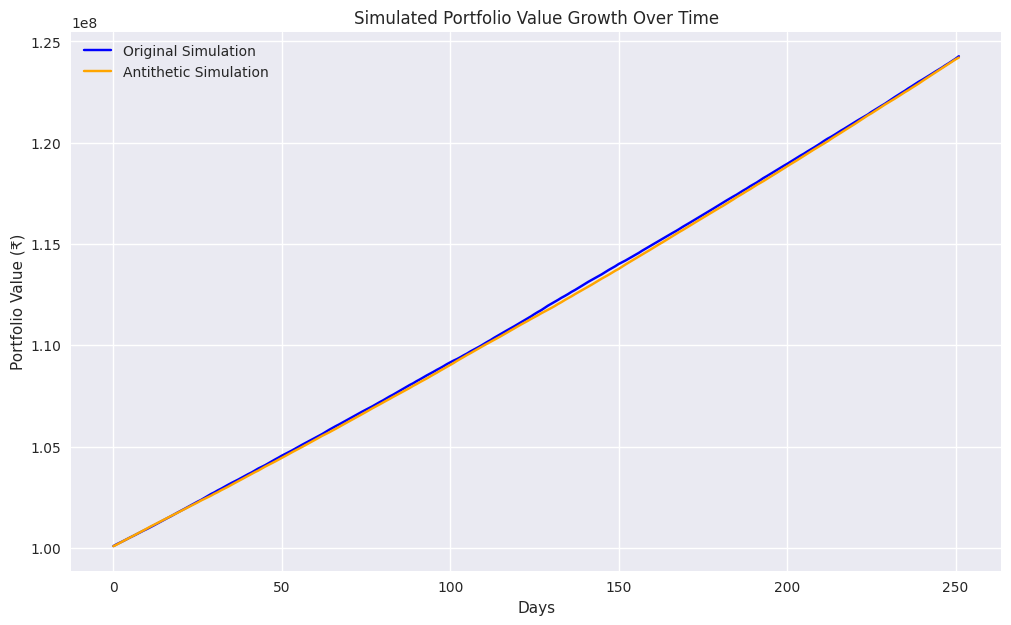

In [16]:

T = portfolio_values_original.shape[1]  
days = np.arange(T)

# Plotting Portfolio Value Growth
plt.figure(figsize=(12, 7))
plt.plot(days, portfolio_values_original.mean(axis=0), label="Original Simulation", color="blue")
plt.plot(days, portfolio_values_antithetic.mean(axis=0), label="Antithetic Simulation", color="orange")

plt.title("Simulated Portfolio Value Growth Over Time")
plt.xlabel("Days")
plt.ylabel("Portfolio Value (₹)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

### Stock Allocation Distribution

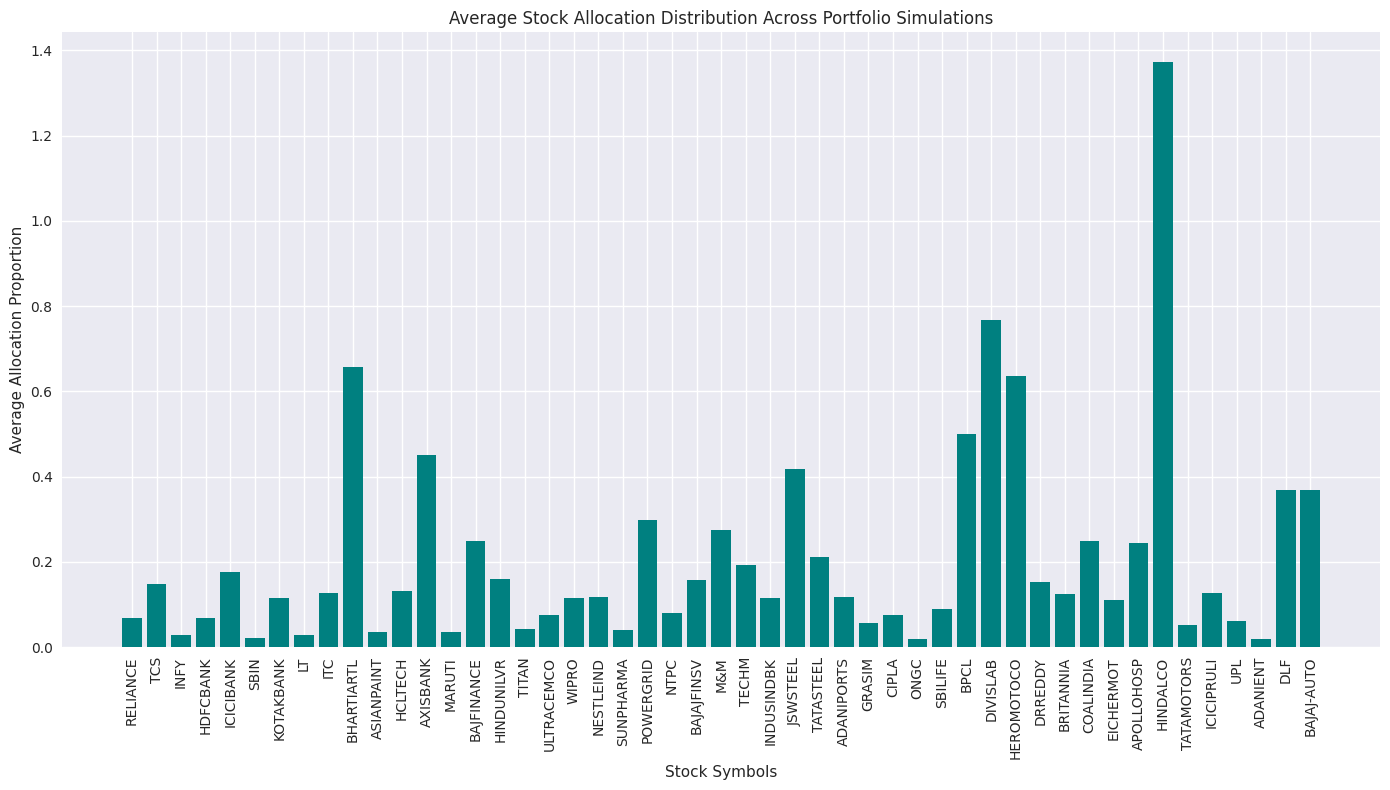

In [18]:

stock_allocations = np.load('/kaggle/working/combined_stock_allocations_batch_1.npy')


average_allocation = stock_allocations.mean(axis=0)  # Average over simulations

# Create labels (Stock symbols used in your simulation)
stock_labels = [
    'RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK', 'SBIN', 'KOTAKBANK', 
    'LT', 'ITC', 'BHARTIARTL', 'ASIANPAINT', 'HCLTECH', 'AXISBANK', 'MARUTI', 'BAJFINANCE', 
    'HINDUNILVR', 'TITAN', 'ULTRACEMCO', 'WIPRO', 'NESTLEIND', 'SUNPHARMA', 'POWERGRID', 
    'NTPC', 'BAJAJFINSV', 'M&M', 'TECHM', 'INDUSINDBK', 'JSWSTEEL', 'TATASTEEL', 
    'ADANIPORTS', 'GRASIM', 'CIPLA', 'ONGC', 'SBILIFE', 'BPCL', 'DIVISLAB', 'HEROMOTOCO', 
    'DRREDDY', 'BRITANNIA', 'COALINDIA', 'EICHERMOT', 'APOLLOHOSP', 'HINDALCO', 'TATAMOTORS', 
    'ICICIPRULI', 'UPL', 'ADANIENT', 'DLF', 'BAJAJ-AUTO'
]

# Plotting the Stock Allocation as a bar chart
plt.figure(figsize=(14, 8))
plt.bar(stock_labels, average_allocation, color='teal')
plt.xticks(rotation=90)
plt.title("Average Stock Allocation Distribution Across Portfolio Simulations")
plt.xlabel("Stock Symbols")
plt.ylabel("Average Allocation Proportion")
plt.tight_layout()
plt.show()


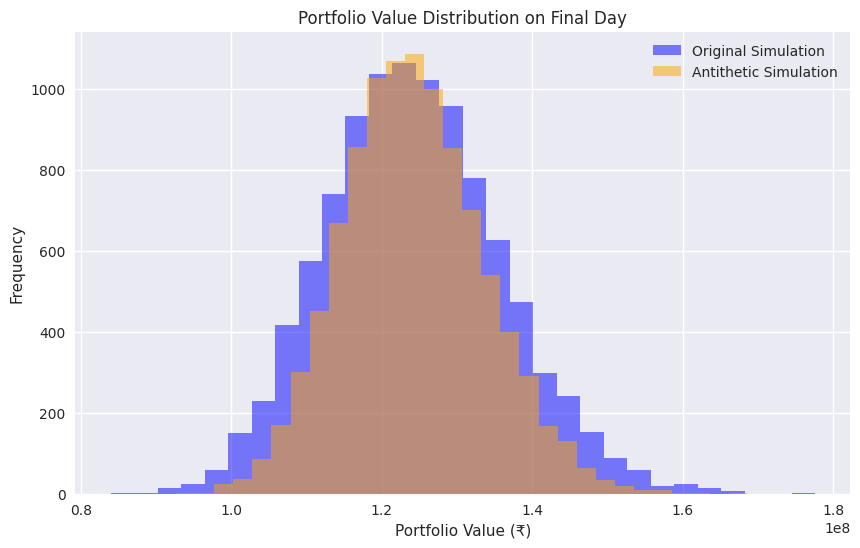

In [19]:
# Portfolio Value Distribution on the Final Day
final_day_values_original = portfolio_values_original[:, -1]
final_day_values_antithetic = portfolio_values_antithetic[:, -1]

plt.figure(figsize=(10, 6))
plt.hist(final_day_values_original, bins=30, alpha=0.5, label="Original Simulation", color="blue")
plt.hist(final_day_values_antithetic, bins=30, alpha=0.5, label="Antithetic Simulation", color="orange")

plt.title("Portfolio Value Distribution on Final Day")
plt.xlabel("Portfolio Value (₹)")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

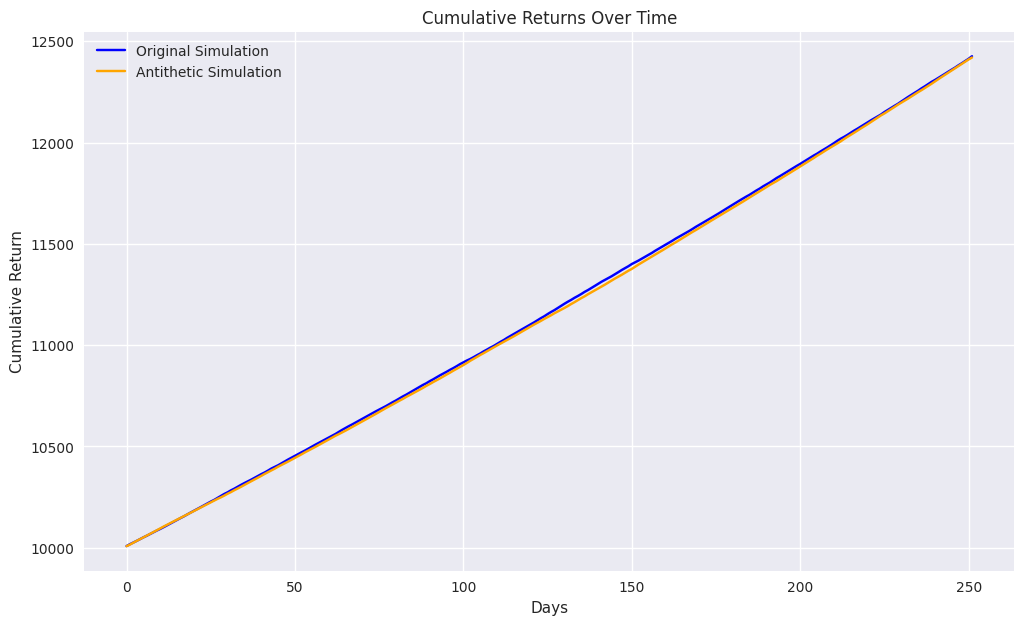

In [20]:
# Calculating Cumulative Returns
cumulative_returns_original = (portfolio_values_original / initial_value - 1).mean(axis=0)
cumulative_returns_antithetic = (portfolio_values_antithetic / initial_value - 1).mean(axis=0)

# Plotting Cumulative Returns
plt.figure(figsize=(12, 7))
plt.plot(days, cumulative_returns_original, label="Original Simulation", color="blue")
plt.plot(days, cumulative_returns_antithetic, label="Antithetic Simulation", color="orange")

plt.title("Cumulative Returns Over Time")
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

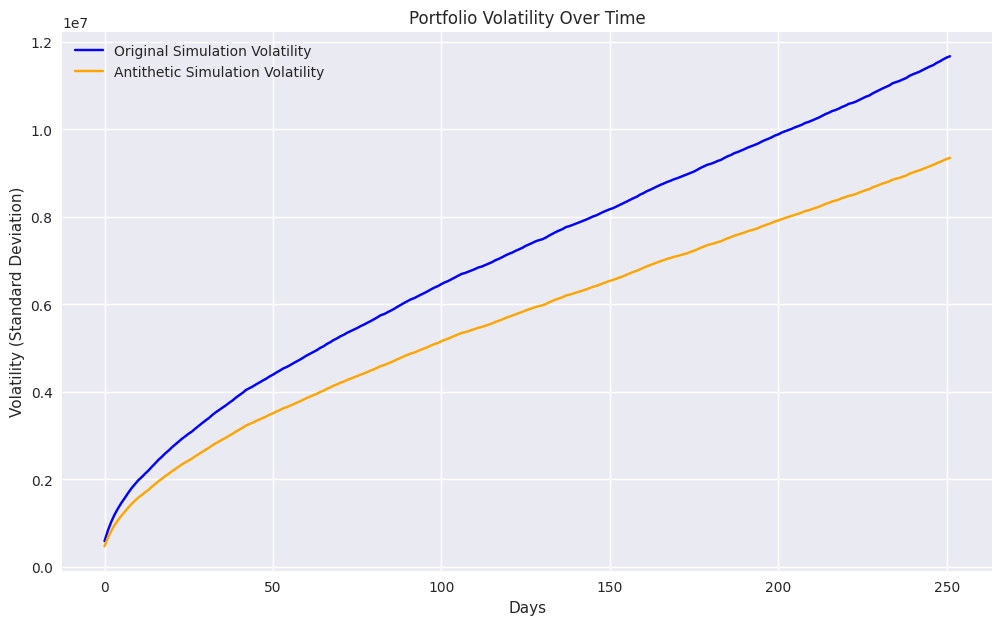

In [21]:
# Calculating Volatility (Standard Deviation) Over Time
volatility_original = portfolio_values_original.std(axis=0)
volatility_antithetic = portfolio_values_antithetic.std(axis=0)

# Plotting Volatility Over Time
plt.figure(figsize=(12, 7))
plt.plot(days, volatility_original, label="Original Simulation Volatility", color="blue")
plt.plot(days, volatility_antithetic, label="Antithetic Simulation Volatility", color="orange")

plt.title("Portfolio Volatility Over Time")
plt.xlabel("Days")
plt.ylabel("Volatility (Standard Deviation)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

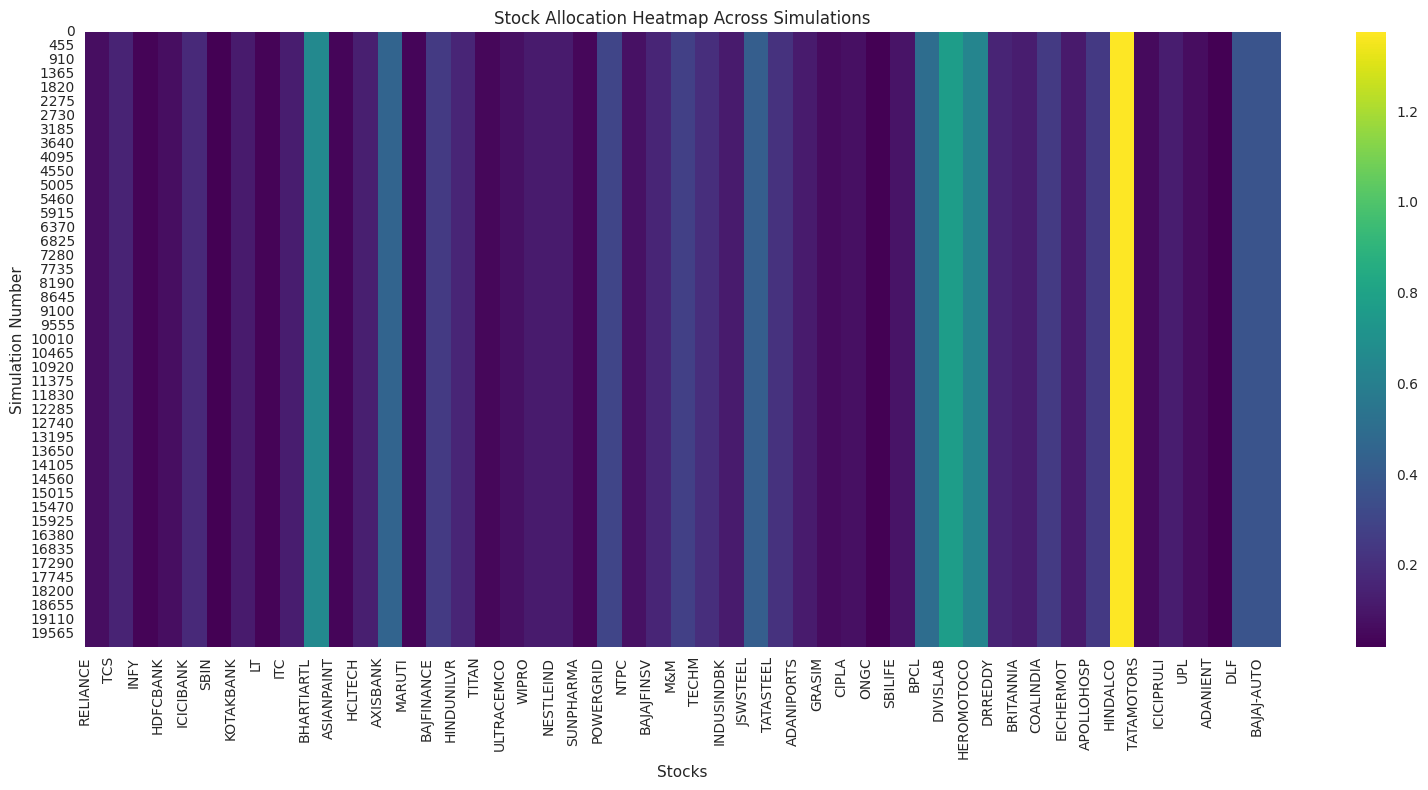

In [23]:
import seaborn as sns

# Loading stock allocation data if not already loaded
stock_allocations = np.load('/kaggle/working/combined_stock_allocations_batch_1.npy')

# Creating a heatmap for stock allocations across different simulations
plt.figure(figsize=(16, 8))
sns.heatmap(stock_allocations, cmap="viridis", cbar=True)
plt.title("Stock Allocation Heatmap Across Simulations")
plt.xlabel("Stocks")
plt.ylabel("Simulation Number")
plt.xticks(ticks=np.arange(len(stock_labels)), labels=stock_labels, rotation=90)
plt.tight_layout()
plt.show()


In [1]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout, BatchNormalization, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import gc

In [2]:

def calculate_metrics(y_true, y_pred):
    """Calculate RMSE, NRMSE, MAPE, and R2 score"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    nrmse = rmse / (np.max(y_true) - np.min(y_true))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    return {
        'rmse': rmse,
        'nrmse': nrmse,
        'mape': mape,
        'r2': r2
    }

In [3]:
#Enhanced Data Generator 
class EnhancedDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, batch_ids, batch_size=32, mode='train', min_return=0.05):
        self.batch_ids = batch_ids
        self.batch_size = batch_size
        self.mode = mode
        self.min_return = min_return
        self.current_batch_data = None
        self.current_batch_id = None
        
class EnhancedDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, batch_ids, batch_size=32, mode='train', min_return=0.05):
        self.batch_ids = batch_ids
        self.batch_size = batch_size
        self.mode = mode
        self.min_return = min_return  # Minimum expected return (5%)
        self.current_batch_data = None
        self.current_batch_id = None
        
    def __len__(self):
        return int(600 * len(self.batch_ids) / self.batch_size)
    
    def load_batch_data(self, batch_id):
        if self.current_batch_id != batch_id:
            self.current_batch_data = None
            gc.collect()
            
            portfolio_values = np.load(f"normalized_portfolio_values_batch_{batch_id}.npy")
            stock_allocations = np.load(f"normalized_stock_allocations_batch_{batch_id}.npy")
            
            if len(stock_allocations.shape) == 2:
                stock_allocations = np.repeat(stock_allocations[:, np.newaxis, :], 252, axis=1)
            
            self.current_batch_data = (portfolio_values, stock_allocations)
            self.current_batch_id = batch_id
    
    def __getitem__(self, idx):
        batch_id = self.batch_ids[idx % len(self.batch_ids)]
        self.load_batch_data(batch_id)
        
        portfolio_values, stock_allocations = self.current_batch_data
        
        start_idx = (idx * self.batch_size) % len(portfolio_values)
        end_idx = min(start_idx + self.batch_size, len(portfolio_values))
        
        batch_portfolio = portfolio_values[start_idx:end_idx]
        batch_stocks = stock_allocations[start_idx:end_idx]
        
        # Generate target days between 253 and 365
        batch_target_days = np.random.randint(253, 366, (end_idx - start_idx, 1)) / 365.0
        
        # Generate future values with minimum return guarantee
        initial_values = batch_portfolio[:, -1, 0]
        min_future_values = initial_values * (1 + self.min_return)
        random_returns = np.random.normal(0.15, 0.1, end_idx - start_idx)  # Mean return of 15%
        batch_future_values = initial_values * (1 + np.maximum(random_returns, self.min_return))
        batch_future_values = np.maximum(batch_future_values, min_future_values)
        batch_future_values = batch_future_values.reshape(-1, 1)
        
        batch_day1_allocations = batch_stocks[:, 0, :]
        
        return ({
            'portfolio_sequence': batch_portfolio,
            'stock_sequence': batch_stocks,
            'target_day': batch_target_days
        }, {
            'future_value': batch_future_values,
            'day1_allocation': batch_day1_allocations
        })

In [4]:
# Improved Model Architecture 
def create_enhanced_model(seq_length=252, num_stocks=49):
    # Input layers
    portfolio_sequence = Input(shape=(seq_length, 1), name='portfolio_sequence')
    stock_sequence = Input(shape=(seq_length, num_stocks), name='stock_sequence')
    target_day = Input(shape=(1,), name='target_day')
    
    # Enhanced portfolio sequence processing
    x1 = Bidirectional(LSTM(128, return_sequences=True))(portfolio_sequence)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Bidirectional(GRU(64))(x1)
    x1 = BatchNormalization()(x1)
    
    # Enhanced stock sequence processing
    x2 = Bidirectional(LSTM(128, return_sequences=True))(stock_sequence)
    x2 = BatchNormalization()(x2)
    x2 = Dropout(0.3)(x2)
    x2 = Bidirectional(GRU(64))(x2)
    x2 = BatchNormalization()(x2)
    
    # Combine features
    combined = Concatenate()([x1, x2, target_day])
    
    # Deeper network with residual connections
    x = Dense(256, activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    residual = x
    
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    
    x = Concatenate()([x, residual])
    
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    
    # Separate branches for value and allocation predictions
    future_value_branch = Dense(64, activation='relu')(x)
    future_value_branch = BatchNormalization()(future_value_branch)
    future_value = Dense(1, activation='relu', name='future_value')(future_value_branch)  # Using ReLU to ensure positive values
    
    allocation_branch = Dense(64, activation='relu')(x)
    allocation_branch = BatchNormalization()(allocation_branch)
    day1_allocation = Dense(num_stocks, activation='softmax', name='day1_allocation')(allocation_branch)
    
    model = Model(
        inputs=[portfolio_sequence, stock_sequence, target_day],
        outputs=[future_value, day1_allocation]
    )
    
    # Custom loss weights to emphasize future value prediction
    model.compile(
        optimizer=Adam(learning_rate=5e-5),
        loss={
            'future_value': 'huber',  # Huber loss is more robust to outliers
            'day1_allocation': 'categorical_crossentropy'
        },
        loss_weights={
            'future_value': 2.0,  # Increased weight for future value prediction
            'day1_allocation': 1.0
        }
    )
    
    return model

In [5]:
def train_enhanced_model():
    # Modified split of batch IDs to include test set
    all_batch_ids = list(range(1, 11))
    train_batch_ids = all_batch_ids[:7]  
    val_batch_ids = all_batch_ids[7:9]   
    test_batch_ids = all_batch_ids[9:]   
    
    # Create enhanced generators
    train_generator = EnhancedDataGenerator(train_batch_ids, batch_size=32, mode='train')
    val_generator = EnhancedDataGenerator(val_batch_ids, batch_size=32, mode='val')
    test_generator = EnhancedDataGenerator(test_batch_ids, batch_size=32, mode='test')
    
    # Create model
    model = create_enhanced_model()
    
    # Enhanced callbacks (same as original)
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            min_delta=1e-4
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6,
            verbose=1
        ),
        ModelCheckpoint(
            'enhanced_model_best.weights.h5',
            monitor='val_loss',
            save_best_only=True,
            save_weights_only=True,
            verbose=1
        )
    ]
    
    # Train with larger number of epochs
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=100,
        callbacks=callbacks,
        verbose=1
    )
    
    return model, history, test_generator


In [6]:
# Cell 6: Run Training and Evaluate Performance
if __name__ == "__main__":
    # Enable mixed precision training for better performance
    tf.keras.mixed_precision.set_global_policy('mixed_float16')
    
    # Train the model
    model, history, test_generator = train_enhanced_model()
    
    # Save the final model
    model.save('enhanced_final_model.h5')
    
    # Evaluate on test set
    print("\nEvaluating on test set...")
    
    # Collect predictions and true values
    true_values = []
    predicted_values = []
    
    for i in range(len(test_generator)):
        batch_x, batch_y = test_generator[i]
        predictions = model.predict(batch_x)
        
        # Collect future value predictions (first output of the model)
        true_values.extend(batch_y['future_value'].flatten())
        predicted_values.extend(predictions[0].flatten())
    
    # Calculate and print metrics
    metrics = calculate_metrics(np.array(true_values), np.array(predicted_values))
    
    print("\nTest Set Performance Metrics:")
    print(f"RMSE: {metrics['rmse']:.4f}")
    print(f"NRMSE: {metrics['nrmse']:.4f}")
    print(f"MAPE: {metrics['mape']:.2f}%")
    print(f"R² Score: {metrics['r2']:.4f}")

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - loss: 30.7930
Epoch 1: val_loss improved from inf to 27.12501, saving model to enhanced_model_best.weights.h5
131/131 ━━━━━━━━━━━━━━━━━━━━ 96s 588ms/step - loss: 30.7916 - val_loss: 27.1250 - learning_rate: 5.0000e-05
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - loss: 30.1826
Epoch 2: val_loss did not improve from 27.12501
131/131 ━━━━━━━━━━━━━━━━━━━━ 74s 540ms/step - loss: 30.1816 - val_loss: 27.4052 - learning_rate: 5.0000e-05
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - loss: 29.6802
Epoch 3: val_loss did not improve from 27.12501
131/131 ━━━━━━━━━━━━━━━━━━━━ 74s 538ms/step - loss: 29.6792 - val_loss: 28.3023 - learning_rate: 5.0000e-05
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - loss: 29.2403
Epoch 4: val_loss did not improve from 27.12501
131/131 ━━━━━━━━━━━━━━━━━━━━ 77s 572ms/step - loss: 29.2396 - val_loss: 27.7812 - learning_rate: 5.0000e-05
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step -

NameError: name 'mean_squared_error' is not defined

In [7]:
# Save the final model
model.save('enhanced_final_model.h5')


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error

# Define the metrics calculation function
def calculate_metrics(y_true, y_pred):
    """Calculate RMSE, NRMSE, MAPE, and R2 score"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    nrmse = rmse / (np.max(y_true) - np.min(y_true))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    return {
        'rmse': rmse,
        'nrmse': nrmse,
        'mape': mape,
        'r2': r2
    }

# Load the saved model
model = load_model('enhanced_final_model.h5')

# Assuming `test_generator` is already defined and prepared
print("\nEvaluating on test set...")

# Collect predictions and true values
true_values = []
predicted_values = []

for i in range(len(test_generator)):
    batch_x, batch_y = test_generator[i]
    predictions = model.predict(batch_x)
    
    # Collect future value predictions (first output of the model)
    true_values.extend(batch_y['future_value'].flatten())
    predicted_values.extend(predictions[0].flatten())

# Calculate and print metrics
metrics = calculate_metrics(np.array(true_values), np.array(predicted_values))

print("\nTest Set Performance Metrics:")
print(f"RMSE: {metrics['rmse']:.4f}")
print(f"NRMSE: {metrics['nrmse']:.4f}")
print(f"MAPE: {metrics['mape']:.2f}%")
print(f"R² Score: {metrics['r2']:.4f}")



Evaluating on test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Test Set Performance Metrics:
RMSE: 0.0944
NRMSE: 0.1218
MAPE: 17.85%
R² Score: 0.4721


In [2]:
# Cell 1: Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
print("All required libraries imported successfully!")

All required libraries imported successfully!


In [5]:
# Cell 2: Stock List Definition
stockList = [
    'RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK', 'SBIN', 'KOTAKBANK', 
    'LT', 'ITC', 'BHARTIARTL', 'ASIANPAINT', 'HCLTECH', 'AXISBANK', 'MARUTI', 'BAJFINANCE', 
    'HINDUNILVR', 'TITAN', 'ULTRACEMCO', 'WIPRO', 'NESTLEIND', 'SUNPHARMA', 'POWERGRID', 
    'NTPC', 'BAJAJFINSV', 'M&M', 'TECHM', 'INDUSINDBK', 'JSWSTEEL', 'TATASTEEL', 
    'ADANIPORTS', 'GRASIM', 'CIPLA', 'ONGC', 'SBILIFE', 'BPCL', 'DIVISLAB', 'HEROMOTOCO', 
    'DRREDDY', 'BRITANNIA', 'COALINDIA', 'EICHERMOT', 'APOLLOHOSP', 'HINDALCO', 'TATAMOTORS', 
    'ICICIPRULI', 'UPL', 'ADANIENT', 'DLF', 'BAJAJ-AUTO'
]
stocks = [stock + '.NS' for stock in stockList]
print(f"Total number of stocks: {len(stocks)}")

Total number of stocks: 49


In [6]:
# Cell 3: Data Preparation Functions
def prepare_prediction_data(stocks, lookback=252):
    print(f"\nPreparing prediction data for {len(stocks)} stocks...")
    
    end_date = dt.datetime.now()
    start_date = end_date - dt.timedelta(days=lookback + 200)  # Buffer days for data
    stock_data = yf.download(stocks, start=start_date, end=end_date)['Close'].ffill()
    
    returns = stock_data.pct_change(fill_method='ffill').fillna(0)
    latest_prices = stock_data.iloc[-1]
    
    n_assets = len(stocks)
    initial_weights = np.ones(n_assets) / n_assets
    portfolio_values = (returns * initial_weights).sum(axis=1)
    portfolio_values = (1 + portfolio_values).cumprod() * 10000
    
    portfolio_values = portfolio_values.values[-lookback:]
    stock_allocations = np.tile(initial_weights, (lookback, 1))
    
    return portfolio_values, stock_allocations, latest_prices

def normalize_prediction_data(portfolio_values, stock_allocations):
    portfolio_scaler = MinMaxScaler()
    allocations_scaler = MinMaxScaler()
    
    portfolio_values_norm = portfolio_scaler.fit_transform(portfolio_values.reshape(-1, 1))
    stock_allocations_norm = allocations_scaler.fit_transform(stock_allocations)
    
    return portfolio_values_norm, stock_allocations_norm, portfolio_scaler, allocations_scaler


In [7]:
# Cell 4: Prediction Function
def predict_portfolio(model_path, stocks, target_day=290):
    print(f"\nStarting portfolio prediction for target day {target_day}...")
    
    model = load_model(model_path)
    
    portfolio_values, stock_allocations, latest_prices = prepare_prediction_data(stocks)
    portfolio_values_norm, stock_allocations_norm, portfolio_scaler, allocations_scaler = normalize_prediction_data(
        portfolio_values, stock_allocations
    )
    
    target_day_norm = np.array([[target_day / 365.0]])
    portfolio_input = portfolio_values_norm.reshape(1, 252, 1)
    stock_input = stock_allocations_norm.reshape(1, 252, -1)
    
    future_value_norm, day1_allocation_norm = model.predict({
        'portfolio_sequence': portfolio_input,
        'stock_sequence': stock_input,
        'target_day': target_day_norm
    })
    
    future_value = portfolio_scaler.inverse_transform(future_value_norm)[0][0]
    day1_allocation = day1_allocation_norm[0]
    investment_per_stock = future_value * day1_allocation
    shares_to_buy = investment_per_stock / latest_prices
    
    return {
        'predicted_value': future_value,
        'day1_allocation': day1_allocation,
        'shares_to_buy': shares_to_buy,
        'investment_per_stock': investment_per_stock
    }

In [8]:
# Cell 5: Run Prediction
try:
    print("\nStarting prediction process...")
    model_path = '/kaggle/working/enhanced_final_model.h5'
    
    result = predict_portfolio(model_path, stocks, target_day=290)
    
    print("\nPrediction Results:")
    print("-" * 50)
    print(f"Predicted Portfolio Value at Day 290: ₹{result['predicted_value']:,.2f}")
    print("\nRecommended Day 1 Allocations:")
    print("-" * 50)
    print(f"{'Stock':12} {'Allocation':>10} {'Shares':>10} {'Investment':>15}")
    print("-" * 50)
    
    for stock, allocation, shares, investment in zip(
        stockList, 
        result['day1_allocation'], 
        result['shares_to_buy'], 
        result['investment_per_stock']
    ):
        print(f"{stock:12} {allocation:9.2%} {shares:10.2f} ₹{investment:14,.2f}")
        
except Exception as e:
    print("\nAn error occurred during the prediction process.")
    print(f"Error: {str(e)}")


Starting prediction process...

Starting portfolio prediction for target day 290...

Preparing prediction data for 49 stocks...


[*********************100%***********************]  49 of 49 completed
/tmp/ipykernel_30/999194987.py:9: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stock_data.pct_change(fill_method='ffill').fillna(0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Prediction Results:
--------------------------------------------------
Predicted Portfolio Value at Day 290: ₹10,832.00

Recommended Day 1 Allocations:
--------------------------------------------------
Stock        Allocation     Shares      Investment
--------------------------------------------------
RELIANCE         0.49%       0.02 ₹         52.56
TCS              0.99%       0.08 ₹        107.25
INFY             0.11%       0.00 ₹         12.02
HDFCBANK         0.53%       0.02 ₹         57.94
ICICIBANK        1.43%       0.14 ₹        154.88
SBIN             0.05%       0.00 ₹          5.86
KOTAKBANK        0.97%       0.06 ₹        104.81
LT               0.12%       0.00 ₹         12.98
ITC              1.00%       0.07 ₹        107.94
BHARTIARTL       6.81%       2.43 ₹        738.00
ASIANPAINT       0.10%       0.00 ₹         10.73
HCLTECH          1.29%       0.09 ₹        139.38
AXISBANK         4.51%       1.10 ₹        488.25
MARUTI  